# PSTAT 134 Final Project
## Netflix Recommender System
Mollie Jiang, Sean Reagan, Sharon Lee, Uy Tran

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
import pandas as pd

recipe_df = pd.read_csv('data/recipes.csv')
ratings_df = pd.read_csv('data/ratings.csv')

In [24]:
recipe_df.head()

,recipe_id,recipe_name,aver_rate,image_url,review_nums,ingredients,cooking_directions,nutritions,reviews
0,222388,Homemade Bacon,5.000000,https://images.media-allrecipes.com/userphotos...,3,pork belly^smoked paprika^kosher salt^ground b...,{'directions': u'Prep\n5 m\nCook\n2 h 45 m\nRe...,"{u'niacin': {u'hasCompleteData': False, u'name...","{8542392: {'rating': 5, 'followersCount': 11, ..."
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,https://images.media-allrecipes.com/userphotos...,29,sauerkraut drained^Granny Smith apples sliced^...,{'directions': u'Prep\n15 m\nCook\n2 h 30 m\nR...,"{u'niacin': {u'hasCompleteData': False, u'name...","{3574785: {'rating': 5, 'followersCount': 0, '..."
2,218939,Foolproof Rosemary Chicken Wings,4.571429,https://images.media-allrecipes.com/userphotos...,12,chicken wings^sprigs rosemary^head garlic^oliv...,"{'directions': u""Prep\n20 m\nCook\n40 m\nReady...","{u'niacin': {u'hasCompleteData': True, u'name'...","{13774946: {'rating': 5, 'followersCount': 0, ..."
3,87211,Chicken Pesto Paninis,4.625000,https://images.media-allrecipes.com/userphotos...,163,focaccia bread quartered^prepared basil pesto^...,{'directions': u'Prep\n15 m\nCook\n5 m\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1563136: {'rating': 5, 'followersCount': 0, '..."
4,245714,Potato Bacon Pizza,4.500000,https://images.media-allrecipes.com/userphotos...,2,red potatoes^strips bacon^Sauce:^heavy whippin...,{'directions': u'Prep\n20 m\nCook\n45 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{2945555: {'rating': 5, 'followersCount': 6690..."


In [25]:
ratings_df.head()

,user_id,recipe_id,rating,dateLastModified
0,8542392,222388,5,2017-04-22T12:46:43.663\n
1,11174581,222388,5,2013-06-20T15:50:25.96\n
2,8262477,222388,5,2015-02-14T07:27:51.307\n
3,3574785,240488,5,2017-10-07T18:20:08.973\n
4,12145410,240488,2,2018-01-06T00:06:09.563\n


# Data Cleaning

In [26]:
print(len(recipe_df))
print(recipe_df.isnull().sum())

49698
recipe_id             0
recipe_name           0
aver_rate             0
image_url             0
review_nums           0
ingredients           0
cooking_directions    0
nutritions            0
reviews               0
dtype: int64


This dataset has 49698 rows, and no missing values so we do not have to deal with any null values.

Now let us get rid of some columns that we will not be using.

In [27]:
columns_to_remove = ['image_url','cooking_directions','nutritions','reviews']
recipe_df = recipe_df.drop(columns=columns_to_remove)

In [28]:
recipe_df.head()

,recipe_id,recipe_name,aver_rate,review_nums,ingredients
0,222388,Homemade Bacon,5.000000,3,pork belly^smoked paprika^kosher salt^ground b...
1,240488,"Pork Loin, Apples, and Sauerkraut",4.764706,29,sauerkraut drained^Granny Smith apples sliced^...
2,218939,Foolproof Rosemary Chicken Wings,4.571429,12,chicken wings^sprigs rosemary^head garlic^oliv...
3,87211,Chicken Pesto Paninis,4.625000,163,focaccia bread quartered^prepared basil pesto^...
4,245714,Potato Bacon Pizza,4.500000,2,red potatoes^strips bacon^Sauce:^heavy whippin...


And likewise with the ratings dataframe!

In [29]:
ratings_df = ratings_df.drop(columns=['dateLastModified'])

In [30]:
ratings_df.head()

,user_id,recipe_id,rating
0,8542392,222388,5
1,11174581,222388,5
2,8262477,222388,5
3,3574785,240488,5
4,12145410,240488,2


Now we can combine our code to create the dataset that we desire to work with

In [31]:
fulldata = pd.merge(recipe_df, ratings_df, on='recipe_id')
# we can now drop aver_rate to declutter the dataframe!
fulldata = fulldata.drop(columns=['aver_rate'])
fulldata.head()


,recipe_id,recipe_name,review_nums,ingredients,user_id,rating
0,222388,Homemade Bacon,3,pork belly^smoked paprika^kosher salt^ground b...,8542392,5
1,222388,Homemade Bacon,3,pork belly^smoked paprika^kosher salt^ground b...,11174581,5
2,222388,Homemade Bacon,3,pork belly^smoked paprika^kosher salt^ground b...,8262477,5
3,240488,"Pork Loin, Apples, and Sauerkraut",29,sauerkraut drained^Granny Smith apples sliced^...,3574785,5
4,240488,"Pork Loin, Apples, and Sauerkraut",29,sauerkraut drained^Granny Smith apples sliced^...,12145410,2


Let us check the length of our new dataset!

In [32]:
len(fulldata)

3794003

It comes out to a whopping 3,794,003 entries!! Lets cut this down a bit to make it actually work without crashing the system.

In [33]:
fulldata_small = fulldata.head(100000)

Let us take a look at the top 10 recipes by average rating

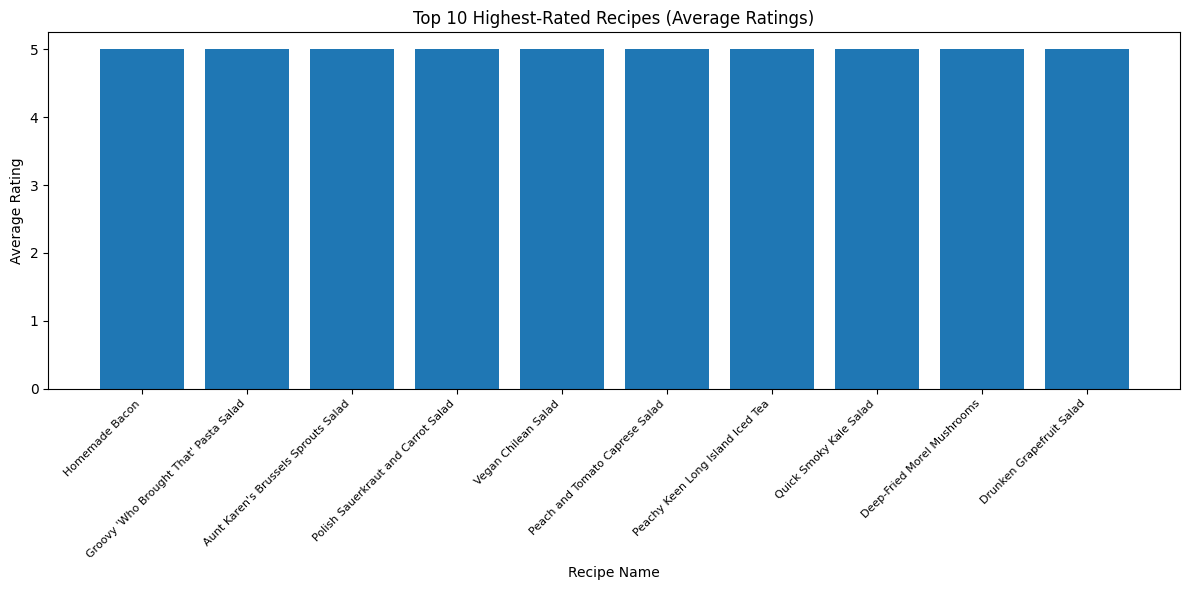

In [34]:
from matplotlib import pyplot as plt
top_10_recipes = recipe_df.sort_values(by=['aver_rate'], ascending=False).head(10)  # Sort and get top 10

# Merge with movie titles for the bar chart

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_10_recipes['recipe_name'], top_10_recipes['aver_rate'])
plt.xlabel("Recipe Name")
plt.ylabel("Average Rating")  # Update y-axis label
plt.title("Top 10 Highest-Rated Recipes (Average Ratings)")
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

Some of the top ones here are Homemade Bacon, Groovy "Who Brought That" Pasta, and Aunt Karen's Brussels Sprouts Salad among others. This gives some small insight into what to expect as the best recipes in our dataset.

We can also look at how many of eahc rating that we have in our dataset with a simple visualization.

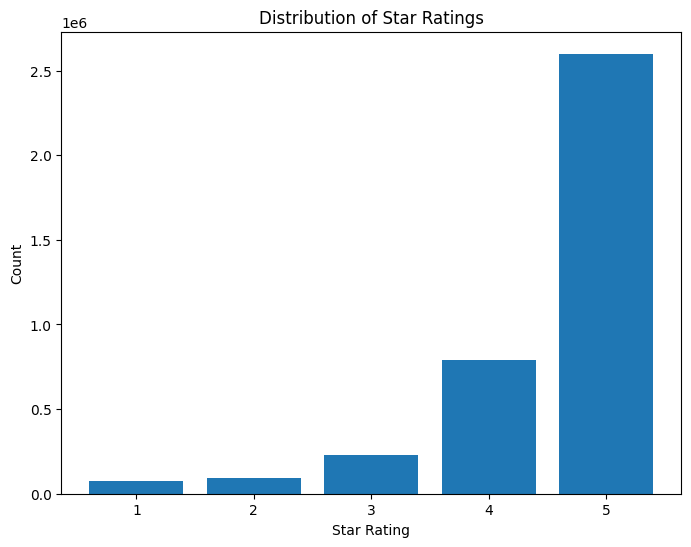

In [35]:
star_counts = ratings_df['rating'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(star_counts.index, star_counts.values)
plt.xlabel("Star Rating")
plt.ylabel("Count")
plt.title("Distribution of Star Ratings")
plt.xticks(star_counts.index)  # Set x-axis ticks to the star rating values
plt.show()

Wow, we have some extremely generous reviewers. This makes some sense as people who are moved enough to review are generally either overly positive or negative. It is surprising that we do not see more 1 or 2 star reviews however.

Now, like in the homework, we are going to make a new string variable that incorporates the ingredients of the dish with the name.

In [36]:
fulldata_small['string'] = fulldata_small['ingredients'].str.replace('^', ' ') + ' ' + fulldata_small['recipe_name']
fulldata_small.head()

/var/folders/5q/9dqld61x0kz9vpw983fx2wlm0000gn/T/ipykernel_36773/2366389844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fulldata_small['string'] = fulldata_small['ingredients'].str.replace('^', ' ') + ' ' + fulldata_small['recipe_name']


,recipe_id,recipe_name,review_nums,ingredients,user_id,rating,string
0,222388,Homemade Bacon,3,pork belly^smoked paprika^kosher salt^ground b...,8542392,5,pork belly smoked paprika kosher salt ground b...
1,222388,Homemade Bacon,3,pork belly^smoked paprika^kosher salt^ground b...,11174581,5,pork belly smoked paprika kosher salt ground b...
2,222388,Homemade Bacon,3,pork belly^smoked paprika^kosher salt^ground b...,8262477,5,pork belly smoked paprika kosher salt ground b...
3,240488,"Pork Loin, Apples, and Sauerkraut",29,sauerkraut drained^Granny Smith apples sliced^...,3574785,5,sauerkraut drained Granny Smith apples sliced ...
4,240488,"Pork Loin, Apples, and Sauerkraut",29,sauerkraut drained^Granny Smith apples sliced^...,12145410,2,sauerkraut drained Granny Smith apples sliced ...


We are going to then use this to create a tf_idf matrix with TfidfVectorizer and tfv.fit

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words="english")

In [38]:
rec_data = fulldata_small.copy()
rec_data
rec_data.drop_duplicates(subset = "recipe_name", keep = "first", inplace = True)

In [39]:
rec_data.reset_index(drop = True, inplace = True)

In [40]:
ingredients = rec_data["string"].str.split(" ").astype(str)
tfv_matrix = tfv.fit_transform(ingredients)

Now that we have that down we can move forward with using a sigmoid kernel from scikit-learn to calculate the pairwise similarities between the items in our previously created tf_idf matrix

In [41]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, index = rec_data["recipe_name"]).drop_duplicates()

In [62]:
# Recommendation Function
def give_recommendation(recipe, sig = sig):

    idx = rec_indices[recipe] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    recipe_indices = [i[0] for i in sig_score]

    # Top 10 most similar recipes
    rec_dic = {"No" : range(1,11),
               "Recipe Name" : rec_data["recipe_name"].iloc[recipe_indices].values,
               "Rating" : rec_data["rating"].iloc[recipe_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)

    print(f"Recommendations for {recipe} viewers :\n")

    return dataframe.style.set_properties(**{"background-color": "white","color":"black","border": "1.5px  solid black"})

In [64]:
give_recommendation("Homemade Bacon")

Recommendations for Homemade Bacon viewers :



,Recipe Name,Rating
No,,
1,Barbecued Pulled Pork with Sweet & Sour Slaw,3
2,Spicy Pulled Pork Pushover,5
3,Sweet and Spicy Ginger Beer Pulled Pork,5
4,Smoked Paprika Goulash for the Slow Cooker,5
5,Eggs in a Basket,4
6,How to Cook a Turkey,5
7,Slow Cooker Texas Smoked Beef Brisket,5
8,Tandoori Chicken II,4
9,Juicy Deer and Bacon Burgers,5


Let's try to give our most active user some recommendations.

In [69]:
user_rating_counts = fulldata_small['user_id'].value_counts()

# Get the user ID with the most ratings
top_user_id = user_rating_counts.idxmax()
top_user_rating_count = user_rating_counts.max()

print(f"User with most ratings: {top_user_id} ({top_user_rating_count} ratings)")

User with most ratings: 268713 (70 ratings)


,recipe_id,recipe_name,review_nums,ingredients,user_id,rating,string
0,222388,Homemade Bacon,3,pork belly^smoked paprika^kosher salt^ground b...,8542392,5,pork belly smoked paprika kosher salt ground b...
1,222388,Homemade Bacon,3,pork belly^smoked paprika^kosher salt^ground b...,11174581,5,pork belly smoked paprika kosher salt ground b...
2,222388,Homemade Bacon,3,pork belly^smoked paprika^kosher salt^ground b...,8262477,5,pork belly smoked paprika kosher salt ground b...
3,240488,"Pork Loin, Apples, and Sauerkraut",29,sauerkraut drained^Granny Smith apples sliced^...,3574785,5,sauerkraut drained Granny Smith apples sliced ...
4,240488,"Pork Loin, Apples, and Sauerkraut",29,sauerkraut drained^Granny Smith apples sliced^...,12145410,2,sauerkraut drained Granny Smith apples sliced ...
...,...,...,...,...,...,...,...
99995,56927,Delicious Ham and Potato Soup,9829,peeled and diced potatoes^diced celery^finely ...,6029906,4,peeled and diced potatoes diced celery finely ...
99996,56927,Delicious Ham and Potato Soup,9829,peeled and diced potatoes^diced celery^finely ...,1458771,4,peeled and diced potatoes diced celery finely ...
99997,56927,Delicious Ham and Potato Soup,9829,peeled and diced potatoes^diced celery^finely ...,4260436,5,peeled and diced potatoes diced celery finely ...
99998,56927,Delicious Ham and Potato Soup,9829,peeled and diced potatoes^diced celery^finely ...,4814265,3,peeled and diced potatoes diced celery finely ...


Here are there favorite recipes.

In [75]:
user_ratings = fulldata_small[fulldata_small['user_id'] == 268713]
sorted_ratings = user_ratings.sort_values(by='rating', ascending=False).head(25)
sorted_ratings

,recipe_id,recipe_name,review_nums,ingredients,user_id,rating,string
2631,8778,Cajun Chicken Pasta,1545,linguine pasta^skinless boneless chicken breas...,268713,5,linguine pasta skinless boneless chicken breas...
69404,26670,Taylor's Piroshki,122,ground beef^onion^salt^ground black pepper to ...,268713,5,ground beef onion salt ground black pepper to ...
73867,74157,Linda's Fake and Bake Chicken,63,cornflake crumbs^seasoned dry bread crumbs^sal...,268713,5,cornflake crumbs seasoned dry bread crumbs sal...
50337,46530,Guinness® Corned Beef,893,corned beef brisket^brown sugar^fluid ounce) can,268713,5,corned beef brisket brown sugar fluid ounce) c...
81816,84259,Italian Subs - Restaurant Style,109,head red leaf lettuce rinsed and torn^medium f...,268713,5,head red leaf lettuce rinsed and torn medium f...
29441,78299,Boilermaker Tailgate Chili,4656,ground beef chuck^bulk Italian sausage^chili b...,268713,5,ground beef chuck bulk Italian sausage chili b...
70207,74796,Beer Roasted Lime Chicken,104,chicken^salt^ground black pepper^lime halved^f...,268713,5,chicken salt ground black pepper lime halved f...
20769,77408,Chinese Spareribs,81,hoisin sauce^ketchup^honey^soy sauce^sake^rice...,268713,5,hoisin sauce ketchup honey soy sauce sake rice...
19971,17605,Party Kielbasa,94,kielbasa sausage^ketchup^grape jelly,268713,5,kielbasa sausage ketchup grape jelly Party Kie...
19315,14445,Bermuda Spinach Salad,264,eggs^bacon^spinach rinsed and chopped^croutons...,268713,5,eggs bacon spinach rinsed and chopped croutons...


They seem to like chicken, so lets recommend them some chicken recipes.

In [73]:
give_recommendation("Cajun Chicken Pasta")

Recommendations for Cajun Chicken Pasta viewers :



,Recipe Name,Rating
No,,
1,Chicken Primavera Alfredo,5
2,Grilled Tequila-Lime Chicken Fajitas,4
3,Herb and Chicken Pasta,1
4,Easy Chicken Pasta,4
5,Chicken Poppy Seed Pasta Salad,4
6,Buffalo Chicken Pasta Salad,4
7,Nanny's Goulash,4
8,Meat and Potato Casserole,4
9,Steph's Summer Salad,4


Some notable recommendations are Grilled Tequila-Lime Chicken Fajitas and Beer Cooked Chicken. We can see that they enjoyed from their previous ratings Chicken made with both Lime and Beer (Beer Roasted Lime Chicken Rated 5/5). They also liked Lemon Stuffed Chicken (Rated 5/5), Chicken with Lemon-Caper Sauce (rated 5/5), and Pot Roast in Beer (Rated 4/5)